## <b>Understanding Feedforward Neural Network</b>

In this lab, you are required to build 3 Feedforward Neural Networks to simulate function
<br> $y = xsin( \frac {x^2} {300})$
<br> in range x: +-100
<br> You need to have a different structure for each model you build.

##Requirements

1 You are required to finish each part below following instructions.
<br>2 You may work on native py files, but your work needs to include same documentation. You may use pytorch or tensorflow keras.
<br>3 You may work in a group of 2.

<br><b>For submission, submit a link to your github repo</b>
<br>All student in the group must submit.

#### Part 1 Data Preparation

In the cell below, generate training data for your model.
<br> Generate a decent amount of training data in the interval of x.
<br>
<br> Since we are only approximating a function, data can be generated by plug in x value and get corresponding y value.
<br>You may use the way to generate data as in file Introduction_to_Artificial_Neural_Network.ipynb ([np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html))
<br>
<br>All data need to be separated by the same distance.
<br>Ex:if you select an intervel from -100 to +100, and a total of 10001 data points, each x coordinate should be separated by 0.02


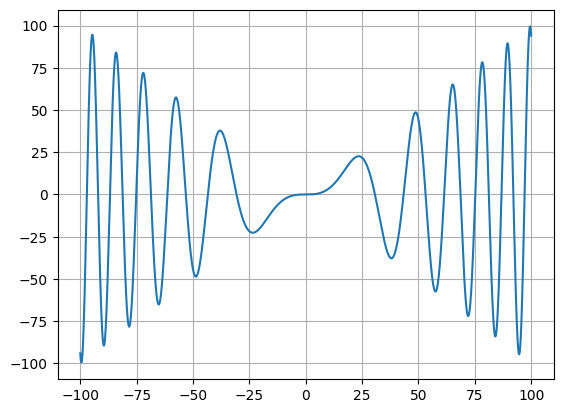

In [ ]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Generate Data
x = np.linspace(-100, 100, 10001)
y = x * np.sin(x**2 / 300)

#### Part 2 Build Models

In the cells below, build your models and train it with data from part1.
<br>
<br> You may use the model built in file Introduction_to_Artificial_Neural_Network.ipynb and change number of layers, number of neurons in each layer, activation function, loss function (loss), batch size, and/or epochs of the model. Or you can build your own model from scratch.
<br>
<br>Observe the change in training process (training time, accuracy changing rate) and final results when you change the parameters.
<br>
<br>You need to split your training data to two parts. With 40% used in training, and 60% used in test. You may do this with sklearn's [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or keras' [validation_split](https://keras.io/api/models/model_training_apis/#fit-method) parameter in fit method together with train_test_split().

In [ ]:
# Split the data into training and traning sets.
xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.6, random_state=69)
xtr = xtr.reshape(-1, 1)
xte = xte.reshape(-1, 1)

In [ ]:
# Model 1: Multi-layer Perceptron with ReLU activation function.
model1 = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=69)
model1.fit(xtr, ytr)
ypred1 = model1.predict(xte)

In [ ]:
# Model 2: Multi-layer Perceptron with hyperbolic tangent (tanh) activation function.
model2 = MLPRegressor(hidden_layer_sizes=(100,), activation='tanh', solver='adam', max_iter=1000, random_state=69)
model2.fit(xtr, ytr)
ypred2 = model2.predict(xte)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Model 3: Multi-layer Perceptron with logistic sigmoid activation function
model3 = MLPRegressor(hidden_layer_sizes=(100,), activation='logistic', solver='adam', max_iter=1000, random_state=69)
model3.fit(xtr, ytr)
ypred3 = model3.predict(xte)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Part 3 Model Evaluation

In the cells below, eval your model with training data, test data (with [model.evaluate()](https://keras.io/api/models/model_training_apis/#evaluate-method) ), and plot your predict result on the same plot with the plot of goal function.

Mean Squared Error for Model 1: 1688.5005208976986
Mean Squared Error for Model 2: 1622.4750092738136
Mean Squared Error for Model 3: 1650.0164810068131


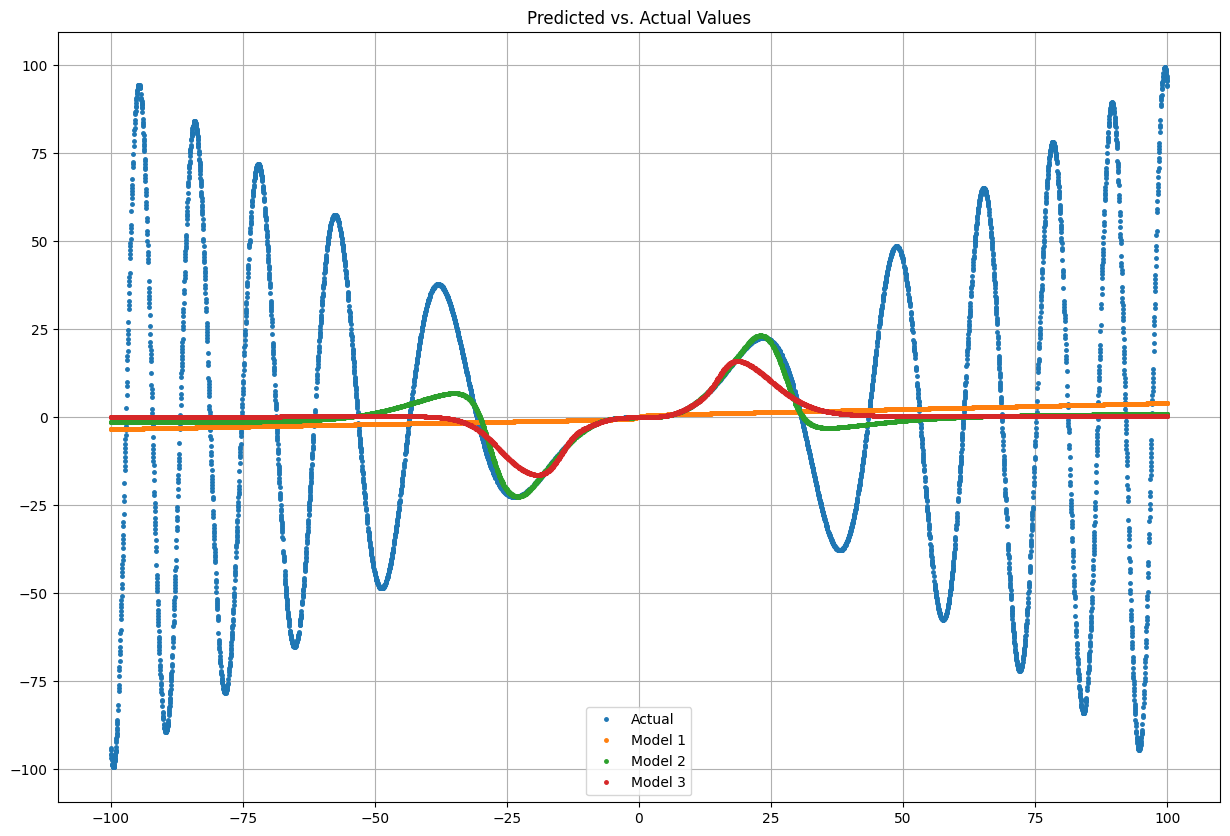

In [ ]:
# Evaluate Model 1
mse1 = mean_squared_error(yte, ypred1)
print("Mean Squared Error for Model 1:", mse1)

# Evaluate Model 2
mse2 = mean_squared_error(yte, ypred2)
print("Mean Squared Error for Model 2:", mse2)

# Evaluate Model 3
mse3 = mean_squared_error(yte, ypred3)
print("Mean Squared Error for Model 3:", mse3)

# Plot the predicted vs. actual values for all models.
plt.figure(figsize=(15, 10))
plt.plot(xte, yte, '.', label='Actual', markersize=5)
plt.plot(xte, ypred1, '.', label='Model 1', markersize=5)
plt.plot(xte, ypred2, '.', label='Model 2', markersize=5)
plt.plot(xte, ypred3, '.', label='Model 3', markersize=5)
plt.grid(True)
plt.legend()
plt.title('Predicted vs. Actual Values')
plt.show()

#### Part 4 Get Model Output and Feedforward by Yourself

Recall how a Feedforward Neural Network gets its output. Now choose your model with highest accuracy, and call [get_weights()](https://keras.io/api/layers/base_layer/#get_weights-method) to get its weights and bias.
<br>
<br> Hint: bias and weights have different dimensions in most cases. Try to guess which index represent bias before you look it up on the internet.

<br> Afterwards, choose 5 data from your training dataset, do all the necessary calculations (with program of course), and get the output of your model. Compare it to the [model.predict()](https://keras.io/api/models/model_training_apis/#predict-method) result.
<br> They should be identical for the first several digitals, if not for all digits.
<br>
<br> If you do not know what are the necessary calculations, they are the steps mentioned in file Introduction_to_Artificial_Neural_Network.ipynb
<br> Matrix transpose can be done easily with [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html) or [numpy](https://numpy.org/doc/stable/reference/generated/numpy.matrix.transpose.html). Activation functions can be applied with [keras' activation functions](https://keras.io/api/layers/activations/#available-activations).


In [ ]:
# Extract weights and biases from Model 2 and manually calculate output for selected inputs.
weights = model2.coefs_
biases = model2.intercepts_

selected_x = xte[:5]
selected_x = selected_x.reshape(-1, 1)

layer1_output = np.dot(selected_x, weights[0]) + biases[0]
layer1_activation = np.tanh(layer1_output)

output = np.dot(layer1_activation, weights[1]) + biases[1]

# Print manually calculated output and Model.predict() output for comparison
print("Manually calculated output:")
print(output)
print("\nModel.predict() output:")
print(ypred2[:5])

Manually calculated output:
[[ 0.8646054 ]
 [ 0.46553711]
 [-0.05264684]
 [-2.27855219]
 [-1.08337156]]

Model.predict() output:
[ 0.8646054   0.46553711 -0.05264684 -2.27855219 -1.08337156]
